# IaC: Upload csv files to AWS S3 Bucker 

In [15]:
import logging
import boto3
from botocore.exceptions import ClientError
import os

In [16]:
# Retrieve the list of existing buckets
s3 = boto3.client('s3')
response = s3.list_buckets()

# Output the bucket names
print('Existing buckets:')
for bucket in response['Buckets']:
    print(f'  {bucket["Name"]}')

Existing buckets:
  qlik-subscribers


In [17]:
# Set directory for files to upload
directory = r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3'

# Set bucket name
bucket = 'qlik-subscribers'

In [18]:
def upload_file(file_name, bucket, object_name=None):
    """Upload a file to an S3 bucket

    :param file_name: File to upload
    :param bucket: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    :return: True if file was uploaded, else False
    """

    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)

    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

In [19]:
# Upload all files in directory

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    print(f)
    upload_file(f, bucket, object_name=None)

C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\customer_cases.csv
C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\dim_customer.csv
C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\dim_geo.csv
C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\fact_active.csv
C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\fact_product.csv
C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\product_info.csv


# Inspect

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\fact_active.csv')
df['month'] = pd.to_datetime(df.date).dt.month
df['year'] = pd.to_datetime(df.date).dt.year

In [7]:
active  = df.groupby(['year', 'month'])['active'].sum()
new  = df.groupby(['year', 'month'])['new_customer'].sum()
cancel  = df.groupby(['year', 'month'])['cancel'].sum()
active.head()

year  month
2017  1         3769
      2         7233
      3        11162
      4        15111
      5        21221
Name: active, dtype: int64

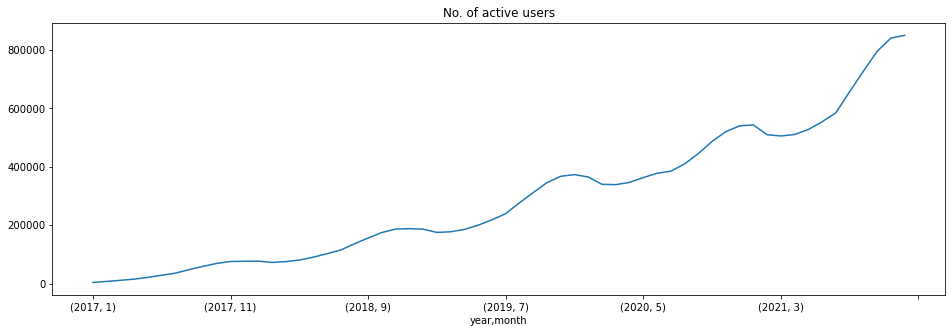

In [8]:
active.plot(figsize=(16,5))
plt.title('No. of active users')
plt.show()

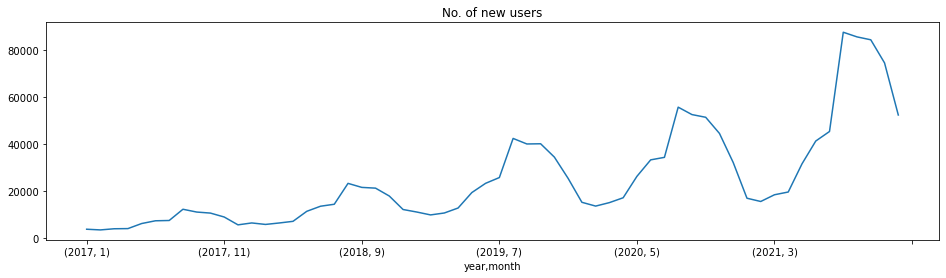

In [9]:
new.plot(figsize=(16,4))
plt.title('No. of new users')
plt.show()

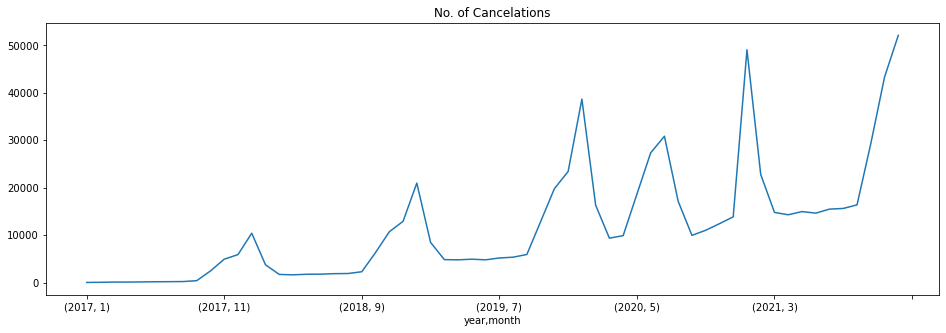

In [10]:
cancel.plot(figsize=(16,5))
plt.title('No. of Cancelations')

plt.show()

In [11]:
customer = pd.read_csv(r'C:\Users\MartinBirkAndreasen\Desktop\Jazz\QlikWorld\subscription\to_s3\dim_customer.csv')
customer.head()

,customer_id,age,gender,age_group,geo_id
0,C2448,76,female,(70-80],61
1,C2449,61,male,(60-70],70
2,C2450,58,female,(50-60],68
3,C2451,62,female,(60-70],41
4,C2452,71,male,(70-80],8


In [14]:
print(len(customer))
customer.drop_duplicates(subset='customer_id')

1508932


,customer_id,age,gender,age_group,geo_id
0,C2448,76,female,(70-80],61
1,C2449,61,male,(60-70],70
2,C2450,58,female,(50-60],68
3,C2451,62,female,(60-70],41
4,C2452,71,male,(70-80],8
...,...,...,...,...,...
1508927,C1511375,46,female,(40-50],53
1508928,C1511376,58,female,(50-60],5
1508929,C1511377,53,male,(50-60],18
1508930,C1511378,54,male,(50-60],81


In [12]:
b = df.set_index('customer_id').join(customer.set_index('customer_id'))
b.tail()

,date,active,new_customer,cancel,month,year,age,gender,age_group,geo_id
customer_id,,,,,,,,,,
C999998,2021-09-30,True,True,False,9,2021,55,male,(50-60],42
C999998,2021-10-31,True,False,False,10,2021,55,male,(50-60],42
C999998,2021-11-30,True,False,False,11,2021,55,male,(50-60],42
C999998,2021-12-31,True,False,False,12,2021,55,male,(50-60],42
C999999,2021-12-31,True,True,False,12,2021,53,male,(50-60],61
